# Code to create a tree diagram for finalists

In [38]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt
import networkx as nx

In [39]:
# Create the list of options
all_elements = [
    "Example 1",
    "Example 2",
    "Example 3",
    "Example 4",
    "Example 5",
    "Example 6",
    "Example 7",
    "Example 8"
]

In [40]:
# We shuffle the array
shuffled = random.sample(all_elements, k=len(all_elements))

In [41]:
# We get half the elements (array/2)
# Quarter finals
# initializing the value of n
n = len(all_elements) / 2
half_element = random.sample(shuffled, k=int(n))

In [42]:
# Semi finals
n = len(half_element) / 2
semi_finals_element = random.sample(half_element, k=int(n))

In [43]:
# Finals
n = len(semi_finals_element) / 2
finals = random.sample(semi_finals_element, k=int(n))

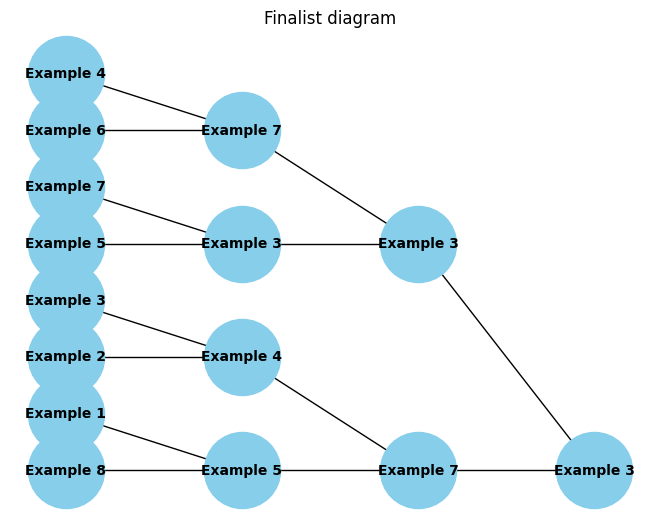

In [44]:
# Create a brackets diagram
G = nx.DiGraph()

# Add nodes for each phase
for i, team in enumerate(shuffled):
    G.add_node(f"{team}_0_{i}", pos=(0, i))

# Adjust the range to cover all elements in half_element
for i, team in enumerate(half_element):
    G.add_node(f"{team}_1_{i}", pos=(1, i * 2))

for i, team in enumerate(semi_finals_element):
    G.add_node(f"{team}_2_{i}", pos=(2, i * 4))

G.add_node(f"{finals[0]}_3", pos=(3, 0))

# Add lines for each phase
for i in range(0, len(all_elements), 2):
    G.add_edge(f"{shuffled[i]}_0_{i}", f"{half_element[i//2]}_1_{i//2}")
    G.add_edge(f"{shuffled[i+1]}_0_{i+1}", f"{half_element[i//2]}_1_{i//2}")

# Adjust the range to cover all elements in half_element
for i in range(0, len(half_element), 2):
    G.add_edge(f"{half_element[i]}_1_{i}", f"{semi_finals_element[i//2]}_2_{i//2}")
    G.add_edge(f"{half_element[i+1]}_1_{i+1}", f"{semi_finals_element[i//2]}_2_{i//2}")

G.add_edge(f"{semi_finals_element[0]}_2_0", f"{finals[0]}_3")
G.add_edge(f"{semi_finals_element[1]}_2_1", f"{finals[0]}_3")

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node.split('_')[0] for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrows=False)
plt.title("Finalist diagram")
plt.show()